In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/meses_producao_custo.csv')

In [4]:
df.head(3)

,Meses,litros,custo
0,Jan,20200,19000
1,Fev,16700,17000
2,Mar,14800,14000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


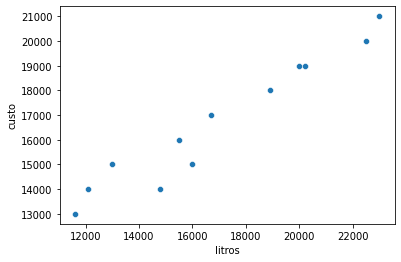

In [5]:
sns.scatterplot(df['litros'], df['custo'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


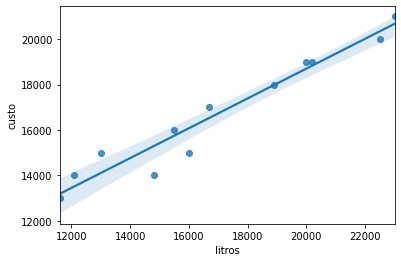

In [6]:
sns.regplot(df['litros'], df['custo'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


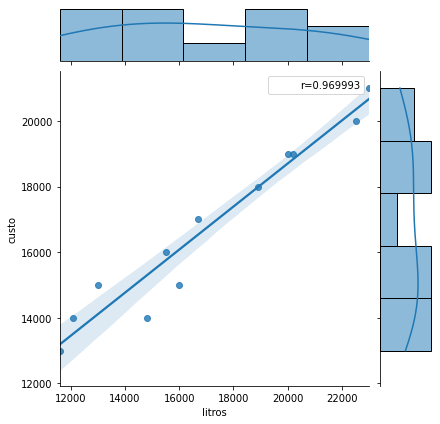

In [9]:
p = sns.jointplot(df['litros'], df['custo'], kind='reg')
r, _ = stats.pearsonr(df['litros'], df['custo'])
phantom, = p.ax_joint.plot([], [], linestyle="", alpha=0)
p.ax_joint.legend([phantom],['r={:f}'.format(r)])
plt.show()

In [10]:
df.corr()

,litros,custo
litros,1.000000,0.969993
custo,0.969993,1.000000


In [25]:
df.corr(method='spearman')

,litros,custo
litros,1.000000,0.970137
custo,0.970137,1.000000


In [11]:
df.head(3)

,Meses,litros,custo
0,Jan,20200,19000
1,Fev,16700,17000
2,Mar,14800,14000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


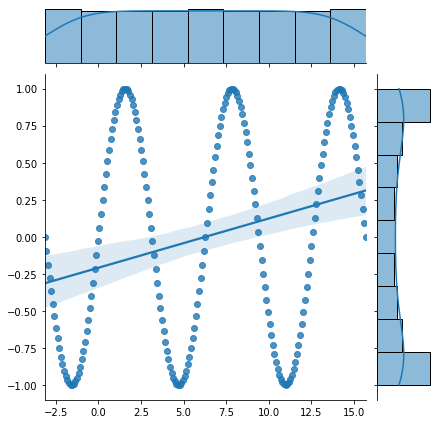

In [22]:
# Base de dados onde pearson não vai ser exatamente útil
x = np.linspace(-np.pi, 5*np.pi, 201)
y = np.sin(x)
p = sns.jointplot(x, y, kind='reg')

In [23]:
r, _ = stats.pearsonr(x, y)
r

0.2577740172023389

In [24]:
r, _ = stats.spearmanr(x,y)
r

0.2486305760137536

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


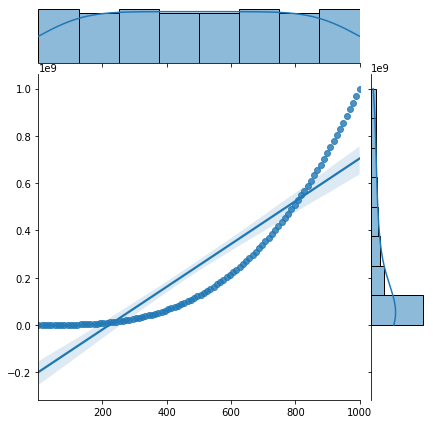

In [15]:
x = np.linspace(1, 1000, 100)
y = x ** 3
sns.jointplot(x,y, kind='reg')

In [20]:
r, _ = stats.pearsonr(x, y)
r

0.9157198842046433

In [21]:
r, _ = stats.spearmanr(x,y)
r

0.9999999999999999

,litros,custo
litros,1.000000,0.970137
custo,0.970137,1.000000


### Relação entre dados categóricos

In [26]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [28]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
# Existe relação entre sexo e sobrevivência?
# Na teoria, as mulheres deveriam ter sido priorizadas!

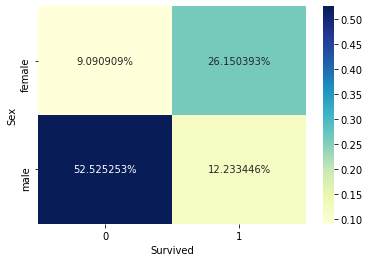

In [35]:
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='all')
sns.heatmap(ctab, annot=True, fmt='%', cmap="YlGnBu")
plt.show()

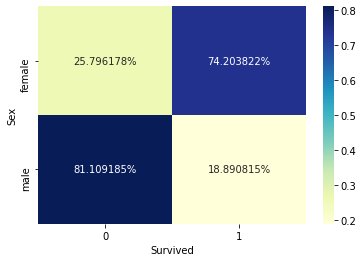

In [36]:
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%', cmap="YlGnBu")
plt.show()

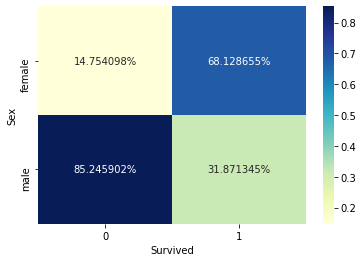

In [38]:
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%', cmap="YlGnBu")
plt.show()

#### Classe e sobrevivência

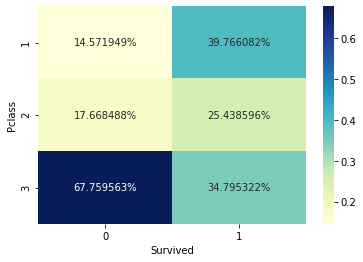

In [40]:
ctab = pd.crosstab(df['Pclass'], df['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%', cmap="YlGnBu")
plt.show()

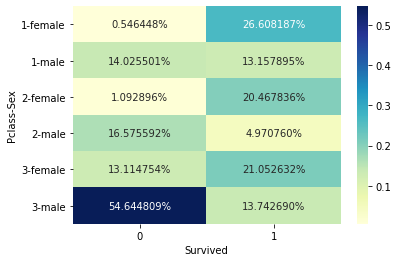

In [42]:
ctab = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%', cmap='YlGnBu')
plt.show()

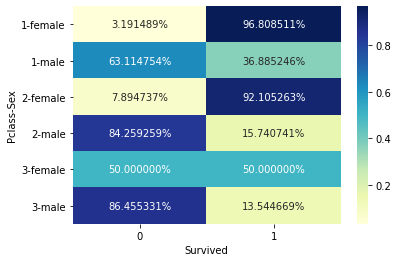

In [43]:
ctab = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%', cmap='YlGnBu')
plt.show()

#### Relação entre idade e sobrevivência

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


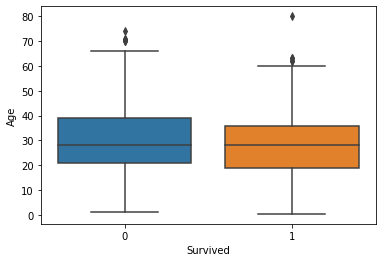

In [45]:
sns.boxplot(df['Survived'], df['Age'])

In [46]:
df['crianca'] = df['Age'].apply(lambda x: 1 if x < 15 else 0)

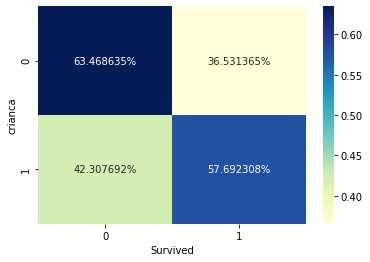

In [50]:
ctab = pd.crosstab(df['crianca'], df['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%', cmap='YlGnBu')
plt.show()

#### Multicolinearidade

In [54]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/ommlbd_familiar.csv', sep=',')

In [55]:
df.head(5)

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,23325,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,667198,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,116666,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,129342,2,1000,1200,2200,1100,54,29,41,0,0,0,0,0,0,0,0,0
4,681531,5,400,1400,4400,880,43,16,25,1,0,0,0,0,0,0,1,1


In [62]:
df.replace(-9999, np.nan, inplace=True)

In [65]:
cor = abs(df.drop('HS_CPF', axis=1).corr())

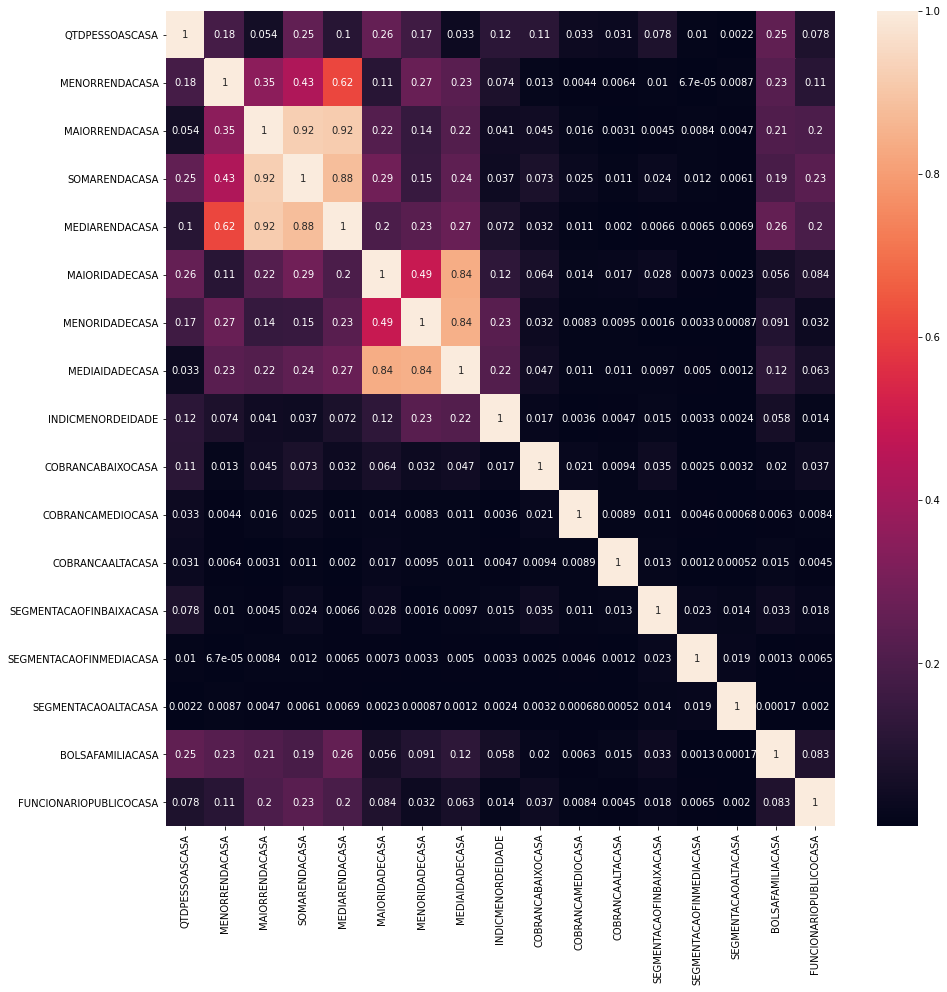

In [66]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, fmt='.2g')
plt.show()

#### VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Para o cálculo do VIF, é necessário não ter valores faltantes
df.fillna(0.0, inplace=True)

In [69]:
def calcula_vif(X):
  vif = pd.DataFrame()
  # guardando as colunas da tabela original
  vif['variaveis'] = X.columns
  # calculando o VIF e armazenando os valores na tabela
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [71]:
resultado_vif = calcula_vif(df)
resultado_vif.sort_values('VIF', ascending=False)

,variaveis,VIF
8,MEDIAIDADECASA,276.059220
6,MAIORIDADECASA,146.082751
7,MENORIDADECASA,50.730578
5,MEDIARENDACASA,37.117309
3,MAIORRENDACASA,31.644339
4,SOMARENDACASA,22.104174
1,QTDPESSOASCASA,13.174765
2,MENORRENDACASA,5.410482
16,BOLSAFAMILIACASA,1.481918
0,HS_CPF,1.346096


In [72]:
df.drop('MEDIAIDADECASA', axis=1, inplace=True)

In [73]:
resultado_vif = calcula_vif(df)
resultado_vif.sort_values('VIF', ascending=False)

,variaveis,VIF
5,MEDIARENDACASA,36.969037
3,MAIORRENDACASA,31.565238
4,SOMARENDACASA,22.097638
6,MAIORIDADECASA,19.566633
1,QTDPESSOASCASA,12.164530
7,MENORIDADECASA,9.453207
2,MENORRENDACASA,5.403039
15,BOLSAFAMILIACASA,1.479845
0,HS_CPF,1.345653
16,FUNCIONARIOPUBLICOCASA,1.319463
